In [46]:
from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy
import xarray

In [30]:
g32 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/ocean_geometry.nc')
g16 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/ocean_geometry.nc')
g4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/ocean_geometry.nc')
g4

<xarray.Dataset>
Dimensions:  (lath: 560, latq: 561, lonh: 240, lonq: 241)
Coordinates:
  * lath     (lath) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * lonh     (lonh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88
  * latq     (latq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.25 69.5 69.75 70.0
  * lonq     (lonq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.0 59.25 59.5 59.75 60.0
Data variables:
    geolatb  (latq, lonq) float64 dask.array<chunksize=(561, 241), meta=np.ndarray>
    geolonb  (latq, lonq) float64 dask.array<chunksize=(561, 241), meta=np.ndarray>
    geolat   (lath, lonh) float64 dask.array<chunksize=(560, 240), meta=np.ndarray>
    geolon   (lath, lonh) float64 dask.array<chunksize=(560, 240), meta=np.ndarray>
    D        (lath, lonh) float64 dask.array<chunksize=(560, 240), meta=np.ndarray>
    f        (latq, lonq) float64 dask.array<chunksize=(561, 241), meta=np.ndarray>
    dxCv     (latq, lonh) float64 dask.array<chunksize=(561, 240), meta=np.ndarray>
    dyCu     (lath, lonq) float64 dask.array<chunksize=(560, 241), meta=np.ndarray>
    dxCu     (lath, lonq) float64 dask.array<chunksize=(560, 241), meta=np.ndarray>
    dyCv     (latq, lonh) float64 dask.array<chunksize=(561, 240), meta=np.ndarray>
    dxT      (lath, lonh) float64 dask.array<chunksize=(560, 240), meta=np.ndarray>
    dyT      (lath, lonh) float64 dask.array<chunksize=(560, 240), meta=np.ndarray>
    dxBu     (latq, lonq) float64 dask.array<chunksize=(561, 241), meta=np.ndarray>
    dyBu     (latq, lonq) float64 dask.array<chunksize=(561, 241), meta=np.ndarray>
    Ah       (lath, lonh) float64 dask.array<chunksize=(560, 240), meta=np.ndarray>
    Aq       (latq, lonq) float64 dask.array<chunksize=(561, 241), meta=np.ndarray>
    dxCvo    (latq, lonh) float64 dask.array<chunksize=(561, 240), meta=np.ndarray>
    dyCuo    (lath, lonq) float64 dask.array<chunksize=(560, 241), meta=np.ndarray>
    wet      (lath, lonh) float64 dask.array<chunksize=(560, 240), meta=np.ndarray>
Attributes:
    filename:  ./ocean_geometry.nc

1.0000023798283117 2.906390236108378 1.4204514202863519


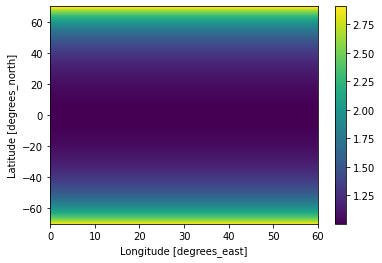

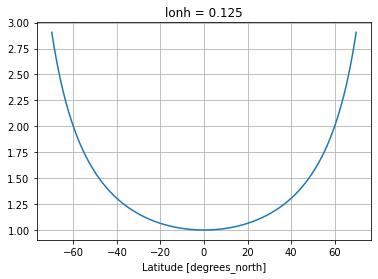

In [22]:
with g4.dyT/g4.dxT as q:
    q.plot()
    print(q.values.min(), q.values.max(), q.values.mean())
    plt.figure()
    q.isel(lonh=0).plot()
    plt.grid()

1.0000000371847448 2.9216154643811008 1.4204565545575947


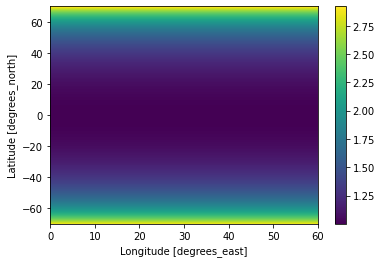

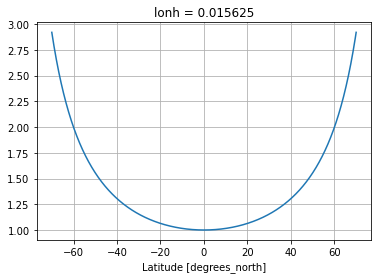

In [23]:
with g32.dyT/g32.dxT as q:
    q.plot()
    print(q.values.min(), q.values.max(), q.values.mean())
    plt.figure()
    q.isel(lonh=0).plot()
    plt.grid()

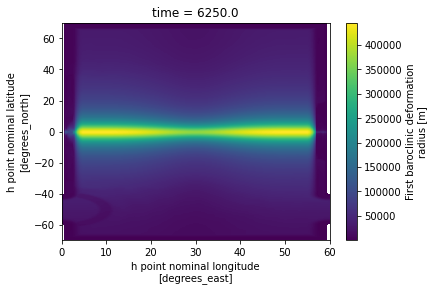

In [29]:
m16 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/longmean_00006250.nc', decode_times=False)
m16.Rd1.plot()

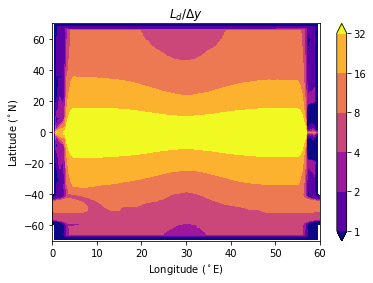

In [102]:
cm = plt.cm.plasma
norm = mpl.colors.BoundaryNorm((1,2,4,8,16,32), ncolors=cm.N, extend='both')
q = m16.Rd1.isel(time=0).values / g16.dyT.values * 2 # the x2 is to convert 1/16 to 1/32
plt.pcolormesh(m16.xq, m16.yq, q, cmap=cm, norm=norm )
plt.colorbar(extend='both');
plt.title('$L_d/\Delta y$'); plt.xlabel('Longitude ($^\circ$E)'); plt.ylabel('Latitude ($^\circ$N)');

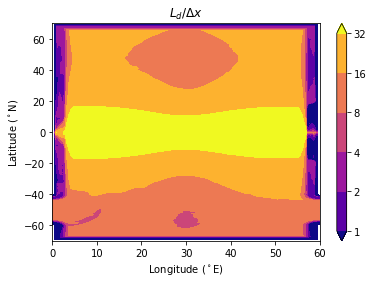

In [103]:
cm = plt.cm.plasma
norm = mpl.colors.BoundaryNorm((1,2,4,8,16,32), ncolors=cm.N, extend='both')
q = m16.Rd1.isel(time=0).values / g16.dxT.values * 2 # the x2 is to convert 1/16 to 1/32
plt.pcolormesh(m16.xq, m16.yq, q, cmap=cm, norm=norm )
plt.colorbar(extend='both');
plt.title('$L_d/\Delta x$'); plt.xlabel('Longitude ($^\circ$E)'); plt.ylabel('Latitude ($^\circ$N)');

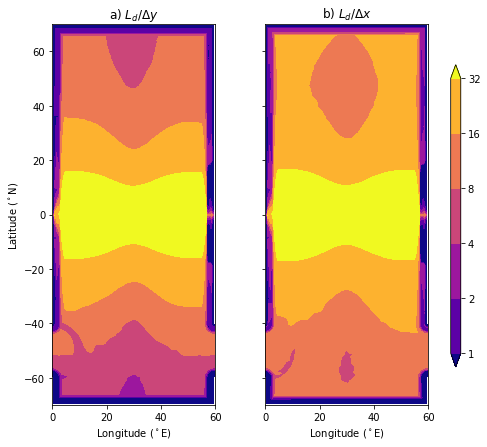

In [114]:
fig,axes = plt.subplots(1,2,figsize=(7,7))
cm = plt.cm.plasma
norm = mpl.colors.BoundaryNorm((1,2,4,8,16,32), ncolors=cm.N, extend='both')
ax,q = axes[0],m16.Rd1.isel(time=0).values / g16.dyT.values * 2 # the x2 is to convert 1/16 to 1/32
ax.pcolormesh(m16.xq, m16.yq, q, cmap=cm, norm=norm )
ax.set_aspect('equal');
ax.set_title('a) $L_d/\Delta y$'); ax.set_xlabel('Longitude ($^\circ$E)'); ax.set_ylabel('Latitude ($^\circ$N)');
ax,q = axes[1],m16.Rd1.isel(time=0).values / g16.dxT.values * 2 # the x2 is to convert 1/16 to 1/32
pcm = ax.pcolormesh(m16.xq, m16.yq, q, cmap=cm, norm=norm )
plt.colorbar(pcm,plt.axes([.93,.2,.02,.6]),extend='both');
ax.set_aspect('equal');
ax.set_title('b) $L_d/\Delta x$'); ax.set_xlabel('Longitude ($^\circ$E)'); ax.set(yticklabels=[],ylabel=None);

plt.savefig('fig02-grid_res_32.png')